# Epithelium Visualization

In [54]:
import tyssue

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline


from tyssue import Sheet, SheetGeometry  as geom
from tyssue.generation import three_faces_sheet
from tyssue.draw.plt_draw import sheet_view
from tyssue import config


In [55]:
datasets, specs = three_faces_sheet()
sheet = Sheet('3cells_2D', datasets, specs)


geom.update_all(sheet)

In [56]:
sheet.vert_df.describe().head(3)

x             y     z   rho  height  basal_shift
count  13.000000  1.300000e+01  13.0  13.0    13.0         13.0
mean    0.000000 -8.540177e-18   0.0   0.0    -4.0          4.0
std     1.172604  1.172570e+00   0.0   0.0     0.0          0.0

## Matplotlib based representation

### Custom settings

These might go in a config file latter on.

#### Ploting itself

## Epithelial sheet representation


### The  default

In [57]:
draw_specs = tyssue.config.draw.sheet_spec()

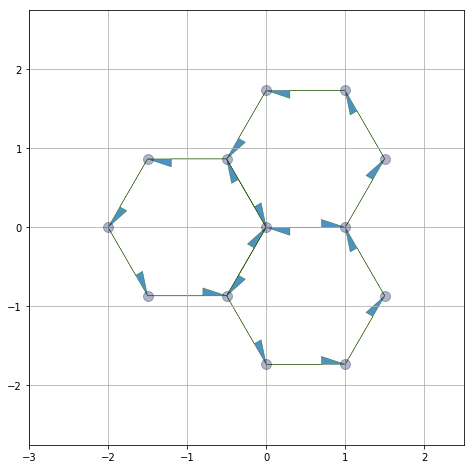

In [58]:
fig, ax = sheet_view(sheet, ['x', 'y'])


ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))
    


#### Coloring

In [45]:

## Let's add a column to sheet.vert_df
sheet.vert_df['rand'] = np.linspace(0.0, 1.0, num=sheet.vert_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.vert_df.rand)

draw_specs['vert']['color'] = color_cmap
draw_specs['vert']['alpha'] = 0.5
draw_specs['vert']['s'] = 500

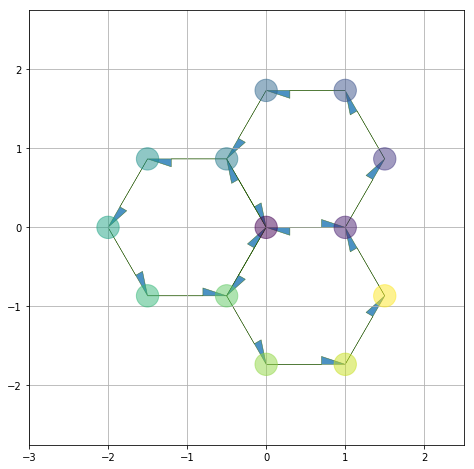

In [46]:
coords = ['x', 'y']
fig, ax = sheet_view(sheet, coords, **draw_specs)

ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))

#### Filling the cells



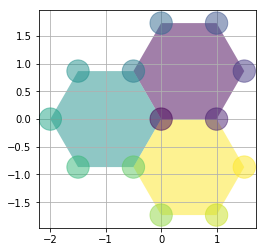

In [47]:
sheet.face_df['col'] = np.linspace(0.0, 1.0, 
                                    num=sheet.face_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.face_df.col)

draw_specs['edge']['visible'] = False

draw_specs['face']['visible'] = True
draw_specs['face']['color'] = color_cmap
draw_specs['face']['alpha'] = 0.5


fig, ax = sheet_view(sheet, coords, **draw_specs)

In [48]:
draw_specs['edge']['visible'] = True

#draw_specs['face']['visible'] = False
draw_specs['face']['color'] = color_cmap
draw_specs['face']['alpha'] = 0.5

edge_color = np.linspace(0.0, 1.0, 
                        num=sheet.edge_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
edge_cmap = cmap(edge_color)
draw_specs['edge']['color'] = edge_cmap #[0, 0, 0, 1]
#draw_specs['edge']['color'] = [0, 0, 0, 0.2]

draw_specs['edge']['width'] = 8. * np.linspace(0.0, 1.0, 
                        num=sheet.edge_df.shape[0])

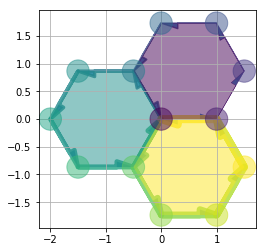

In [49]:
fig, ax = sheet_view(sheet, coords, **draw_specs)

### Vispy based

(Currently broken - problems with matplotlib 2.2+ on vispy part)

In [50]:
from tyssue.draw.vispy_draw import vp_view

/home/guillaume/miniconda3/envs/py36/lib/python3.6/site-packages/vispy/visuals/isocurve.py:22: UserWarning: VisPy is not yet compatible with matplotlib 2.2+
  warnings.warn("VisPy is not yet compatible with matplotlib 2.2+")


In [18]:
# vp_view(sheet)

## Ipyvolume based

In [51]:
from tyssue import Monolayer, config
from tyssue.generation import extrude

extruded = extrude(sheet.datasets, method='translation')
specs = config.geometry.bulk_spec()
monolayer = Monolayer('mono', extruded, specs)


from tyssue.draw.ipv_draw import view_ipv
import ipyvolume as ipv
ipv.clear()
fig2, mesh = view_ipv(monolayer)
fig2

/home/guillaume/miniconda3/envs/py36/lib/python3.6/site-packages/tyssue-0.2.0-py3.6.egg/tyssue/draw/ipv_draw.py:69: UserWarning: `view_ipv` is deprecated, use the more generic `sheet_view`
  warnings.warn('`view_ipv` is deprecated, use the more generic `sheet_view`')


Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0…

### Vertex based color

In [52]:
color = (monolayer.vert_df.x**2
         + monolayer.vert_df.y**2
         + monolayer.vert_df.z**2)

ipv.clear()
fig2, mesh = view_ipv(monolayer, color=color)
fig2

/home/guillaume/miniconda3/envs/py36/lib/python3.6/site-packages/tyssue-0.2.0-py3.6.egg/tyssue/draw/ipv_draw.py:69: UserWarning: `view_ipv` is deprecated, use the more generic `sheet_view`
  warnings.warn('`view_ipv` is deprecated, use the more generic `sheet_view`')


Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0…

#### Edge based color

In [53]:
color = monolayer.edge_df['dy']
ipv.clear()
fig2, mesh = view_ipv(monolayer, color=color)
fig2

/home/guillaume/miniconda3/envs/py36/lib/python3.6/site-packages/tyssue-0.2.0-py3.6.egg/tyssue/draw/ipv_draw.py:69: UserWarning: `view_ipv` is deprecated, use the more generic `sheet_view`
  warnings.warn('`view_ipv` is deprecated, use the more generic `sheet_view`')


Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0…